In [17]:
# install all packages 
import nilearn.image as nimg
import nilearn.plotting as nplt
import nilearn.glm.first_level as glm
import numpy as np
import pandas as pd
from nilearn.glm.first_level import first_level_from_bids
from nilearn.glm.first_level import FirstLevelModel
from nilearn.glm.second_level import SecondLevelModel
from nilearn.image import get_data
from nilearn.plotting import plot_stat_map
from nilearn.masking import apply_mask
from nilearn.image import resample_to_img
from nilearn.datasets import load_mni152_brain_mask
from nilearn.masking import apply_mask
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from nilearn.image import threshold_img
from nilearn.image import math_img
from nilearn.datasets import load_mni152_template
from nilearn import datasets
from nilearn.datasets import fetch_atlas_aal
from nilearn.input_data import NiftiLabelsMasker
from nilearn import plotting
from nilearn.datasets import fetch_atlas_harvard_oxford
from nilearn.image import index_img
from nilearn.regions import connected_regions
from nilearn.masking import apply_mask
import nibabel as nib
from nilearn.decoding import SearchLight

In [2]:
# first-level analysis set up 
bids_root = r"C:\Users\elena\ds002785"   # here is the dataset stored in BIDS format
task_label = "workingmemory"             # we only work with working memory so we need to extract onlty this from the dataset 

models, bold_imgs, confounds, events = first_level_from_bids(dataset_path=bids_root, task_label="workingmemory", img_filters=[("desc", "preproc")],
    smoothing_fwhm=6, high_pass=0.01, noise_model="ar1", standardize=True, signal_scaling=0, derivatives_folder="derivatives/fmriprep", verbose=1,)
# this is the GLM
# we work with the pre processed imgages
# we do smooting for improving signal to noice ratio, 6 is a common choise 
# we do high-pass filtering again to remove some noise that isn't related to neural activity, this 0.01 is a common choise 
# the noise model accounts for autocorrelation because in fMRI, each time point is related to the previous one 
# signal scaling is 0 because in that way the signal stays like it is 
# verbose gives you a detailed output so you can see more information about what is being processed

bold_imgs = [img[0] if isinstance(img, list) else img for img in bold_imgs] # the BOLD images need to be correctly formatted, this is how you check that
subject_ids = [model.subject_label for model in models] # here we can se if the subjects are labeled correctly 

C:\Users\elena\AppData\Local\Temp\ipykernel_16776\4275340271.py:5: UserWarning: 'StartTime' not found in file C:\Users\elena\ds002785\derivatives\fmriprep\sub-0001\func\sub-0001_task-workingmemory_acq-seq_space-MNI152NLin2009cAsym_desc-preproc_bold.json.
  models, bold_imgs, confounds, events = first_level_from_bids(dataset_path=bids_root, task_label="workingmemory", img_filters=[("desc", "preproc")],


[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0001
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0001\func\sub-0001_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0001
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0001\func\sub-0001_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0001
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0001\func\sub-0001_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0002
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0002\func\sub-0002_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0002
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0002\func\sub-0002_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0002
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0002\func\sub-0002_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0003
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0003\func\sub-0003_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0003
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0003\func\sub-0003_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0003
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0003\func\sub-0003_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0004
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0004\func\sub-0004_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0004
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0004\func\sub-0004_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0004
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0004\func\sub-0004_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0005
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0005\func\sub-0005_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0005
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0005\func\sub-0005_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0005
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0005\func\sub-0005_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0006
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0006\func\sub-0006_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0006
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0006\func\sub-0006_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0006
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0006\func\sub-0006_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0007
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0007\func\sub-0007_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0007
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0007\func\sub-0007_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0007
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0007\func\sub-0007_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0008
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0008\func\sub-0008_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0008
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0008\func\sub-0008_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0008
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0008\func\sub-0008_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0009
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0009\func\sub-0009_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0009
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0009\func\sub-0009_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0009
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0009\func\sub-0009_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0010
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0010\func\sub-0010_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0010
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0010\func\sub-0010_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0010
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0010\func\sub-0010_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0011
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0011\func\sub-0011_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0011
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0011\func\sub-0011_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0011
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0011\func\sub-0011_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0012
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0012\func\sub-0012_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0012
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0012\func\sub-0012_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0012
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0012\func\sub-0012_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0013
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0013\func\sub-0013_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0013
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0013\func\sub-0013_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0013
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0013\func\sub-0013_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0014
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0014\func\sub-0014_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0014
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0014\func\sub-0014_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0014
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0014\func\sub-0014_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0015
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0015\func\sub-0015_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0015
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0015\func\sub-0015_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0015
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0015\func\sub-0015_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0016
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0016\func\sub-0016_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0016
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0016\func\sub-0016_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0016
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0016\func\sub-0016_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0017
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0017\func\sub-0017_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0017
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0017\func\sub-0017_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0017
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0017\func\sub-0017_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0019
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0019\func\sub-0019_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0019
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0019\func\sub-0019_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0019
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0019\func\sub-0019_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0020
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0020\func\sub-0020_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0020
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0020\func\sub-0020_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0020
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0020\func\sub-0020_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0021
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0021\func\sub-0021_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0021
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0021\func\sub-0021_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0021
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0021\func\sub-0021_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0022
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0022\func\sub-0022_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0022
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0022\func\sub-0022_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0022
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0022\func\sub-0022_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0024
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0024\func\sub-0024_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0024
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0024\func\sub-0024_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0024
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0024\func\sub-0024_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0025
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0025\func\sub-0025_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0025
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0025\func\sub-0025_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0025
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0025\func\sub-0025_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0026
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0026\func\sub-0026_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0026
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0026\func\sub-0026_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0026
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0026\func\sub-0026_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0027
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0027\func\sub-0027_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0027
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0027\func\sub-0027_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0027
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0027\func\sub-0027_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0028
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0028\func\sub-0028_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0028
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0028\func\sub-0028_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0028
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0028\func\sub-0028_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0029
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0029\func\sub-0029_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0029
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0029\func\sub-0029_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0029
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0029\func\sub-0029_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0030
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0030\func\sub-0030_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0030
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0030\func\sub-0030_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0030
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0030\func\sub-0030_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0031
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0031\func\sub-0031_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0031
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0031\func\sub-0031_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0031
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0031\func\sub-0031_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0033
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0033\func\sub-0033_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0033
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0033\func\sub-0033_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0033
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0033\func\sub-0033_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0034
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0034\func\sub-0034_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0034
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0034\func\sub-0034_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0034
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0034\func\sub-0034_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0035
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0035\func\sub-0035_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0035
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0035\func\sub-0035_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0035
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0035\func\sub-0035_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0036
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0036\func\sub-0036_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0036
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0036\func\sub-0036_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0036
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0036\func\sub-0036_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0037
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0037\func\sub-0037_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0037
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0037\func\sub-0037_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0037
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0037\func\sub-0037_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0038
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0038\func\sub-0038_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0038
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0038\func\sub-0038_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0038
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0038\func\sub-0038_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0039
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0039\func\sub-0039_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0039
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0039\func\sub-0039_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0039
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0039\func\sub-0039_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0040
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0040\func\sub-0040_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0040
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0040\func\sub-0040_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0040
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0040\func\sub-0040_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0041
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0041\func\sub-0041_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0041
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0041\func\sub-0041_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0041
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0041\func\sub-0041_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0043
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0043\func\sub-0043_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0043
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0043\func\sub-0043_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0043
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0043\func\sub-0043_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0044
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0044\func\sub-0044_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0044
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0044\func\sub-0044_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0044
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0044\func\sub-0044_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0045
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0045\func\sub-0045_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0045
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0045\func\sub-0045_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0045
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0045\func\sub-0045_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0046
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0046\func\sub-0046_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0046
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0046\func\sub-0046_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0046
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0046\func\sub-0046_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0047
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0047\func\sub-0047_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0047
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0047\func\sub-0047_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0047
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0047\func\sub-0047_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0048
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0048\func\sub-0048_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0048
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0048\func\sub-0048_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0048
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0048\func\sub-0048_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0049
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0049\func\sub-0049_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0049
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0049\func\sub-0049_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0049
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0049\func\sub-0049_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0050
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0050\func\sub-0050_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0050
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0050\func\sub-0050_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0050
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0050\func\sub-0050_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0051
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0051\func\sub-0051_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0051
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0051\func\sub-0051_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0051
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0051\func\sub-0051_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0052
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0052\func\sub-0052_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0052
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0052\func\sub-0052_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0052
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0052\func\sub-0052_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0053
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0053\func\sub-0053_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0053
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0053\func\sub-0053_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0053
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0053\func\sub-0053_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0054
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0054\func\sub-0054_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0054
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0054\func\sub-0054_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0054
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0054\func\sub-0054_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0055
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0055\func\sub-0055_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0055
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0055\func\sub-0055_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0055
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0055\func\sub-0055_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0056
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0056\func\sub-0056_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0056
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0056\func\sub-0056_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0056
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0056\func\sub-0056_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0057
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0057\func\sub-0057_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0057
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0057\func\sub-0057_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0057
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0057\func\sub-0057_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0058
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0058\func\sub-0058_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0058
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0058\func\sub-0058_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0058
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0058\func\sub-0058_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0059
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0059\func\sub-0059_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0059
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0059\func\sub-0059_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0059
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0059\func\sub-0059_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0060
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0060\func\sub-0060_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0060
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0060\func\sub-0060_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0060
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0060\func\sub-0060_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0061
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0061\func\sub-0061_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0061
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0061\func\sub-0061_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0061
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0061\func\sub-0061_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0062
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0062\func\sub-0062_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0062
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0062\func\sub-0062_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0062
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0062\func\sub-0062_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0063
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0063\func\sub-0063_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0063
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0063\func\sub-0063_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0063
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0063\func\sub-0063_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0064
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0064\func\sub-0064_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0064
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0064\func\sub-0064_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0064
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0064\func\sub-0064_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0065
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0065\func\sub-0065_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0065
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0065\func\sub-0065_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0065
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0065\func\sub-0065_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0066
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0066\func\sub-0066_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0066
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0066\func\sub-0066_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0066
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0066\func\sub-0066_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0067
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0067\func\sub-0067_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0067
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0067\func\sub-0067_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0067
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0067\func\sub-0067_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0068
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0068\func\sub-0068_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0068
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0068\func\sub-0068_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0068
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0068\func\sub-0068_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0069
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0069\func\sub-0069_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0069
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0069\func\sub-0069_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0069
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0069\func\sub-0069_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0070
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0070\func\sub-0070_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0070
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0070\func\sub-0070_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0070
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0070\func\sub-0070_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0071
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0071\func\sub-0071_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0071
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0071\func\sub-0071_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0071
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0071\func\sub-0071_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0072
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0072\func\sub-0072_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0072
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0072\func\sub-0072_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0072
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0072\func\sub-0072_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0073
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0073\func\sub-0073_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0073
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0073\func\sub-0073_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0073
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0073\func\sub-0073_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0074
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0074\func\sub-0074_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0074
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0074\func\sub-0074_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0074
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0074\func\sub-0074_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0075
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0075\func\sub-0075_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0075
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0075\func\sub-0075_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0075
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0075\func\sub-0075_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0076
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0076\func\sub-0076_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0076
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0076\func\sub-0076_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0076
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0076\func\sub-0076_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0077
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0077\func\sub-0077_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0077
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0077\func\sub-0077_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0077
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0077\func\sub-0077_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0078
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0078\func\sub-0078_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0078
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0078\func\sub-0078_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0078
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0078\func\sub-0078_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0079
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0079\func\sub-0079_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0079
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0079\func\sub-0079_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0079
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0079\func\sub-0079_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0080
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0080\func\sub-0080_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0080
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0080\func\sub-0080_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0080
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0080\func\sub-0080_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0081
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0081\func\sub-0081_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0081
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0081\func\sub-0081_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0081
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0081\func\sub-0081_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0082
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0082\func\sub-0082_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0082
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0082\func\sub-0082_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0082
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0082\func\sub-0082_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0083
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0083\func\sub-0083_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0083
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0083\func\sub-0083_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0083
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0083\func\sub-0083_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0084
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0084\func\sub-0084_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0084
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0084\func\sub-0084_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0084
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0084\func\sub-0084_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0085
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0085\func\sub-0085_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0085
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0085\func\sub-0085_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0085
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0085\func\sub-0085_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0087
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0087\func\sub-0087_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0087
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0087\func\sub-0087_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0087
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0087\func\sub-0087_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0088
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0088\func\sub-0088_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0088
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0088\func\sub-0088_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0088
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0088\func\sub-0088_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0090
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0090\func\sub-0090_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0090
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0090\func\sub-0090_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0090
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0090\func\sub-0090_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0091
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0091\func\sub-0091_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0091
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0091\func\sub-0091_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0091
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0091\func\sub-0091_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0092
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0092\func\sub-0092_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0092
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0092\func\sub-0092_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0092
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0092\func\sub-0092_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0093
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0093\func\sub-0093_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0093
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0093\func\sub-0093_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0093
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0093\func\sub-0093_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0094
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0094\func\sub-0094_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0094
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0094\func\sub-0094_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0094
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0094\func\sub-0094_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0095
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0095\func\sub-0095_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0095
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0095\func\sub-0095_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0095
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0095\func\sub-0095_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0096
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0096\func\sub-0096_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0096
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0096\func\sub-0096_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0096
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0096\func\sub-0096_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0097
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0097\func\sub-0097_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0097
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0097\func\sub-0097_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0097
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0097\func\sub-0097_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0098
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0098\func\sub-0098_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0098
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0098\func\sub-0098_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0098
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0098\func\sub-0098_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0099
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0099\func\sub-0099_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0099
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0099\func\sub-0099_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0099
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0099\func\sub-0099_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0100
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0100\func\sub-0100_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0100
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0100\func\sub-0100_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0100
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0100\func\sub-0100_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0101
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0101\func\sub-0101_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0101
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0101\func\sub-0101_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0101
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0101\func\sub-0101_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0102
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0102\func\sub-0102_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0102
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0102\func\sub-0102_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0102
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0102\func\sub-0102_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0103
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0103\func\sub-0103_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0103
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0103\func\sub-0103_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0103
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0103\func\sub-0103_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0104
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0104\func\sub-0104_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0104
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0104\func\sub-0104_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0104
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0104\func\sub-0104_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0105
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0105\func\sub-0105_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0105
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0105\func\sub-0105_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0105
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0105\func\sub-0105_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0106
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0106\func\sub-0106_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0106
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0106\func\sub-0106_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0106
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0106\func\sub-0106_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0108
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0108\func\sub-0108_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0108
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0108\func\sub-0108_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0108
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0108\func\sub-0108_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0109
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0109\func\sub-0109_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0109
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0109\func\sub-0109_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0109
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0109\func\sub-0109_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0110
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0110\func\sub-0110_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0110
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0110\func\sub-0110_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0110
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0110\func\sub-0110_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0111
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0111\func\sub-0111_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0111
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0111\func\sub-0111_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0111
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0111\func\sub-0111_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0112
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0112\func\sub-0112_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0112
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0112\func\sub-0112_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0112
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0112\func\sub-0112_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0113
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0113\func\sub-0113_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0113
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0113\func\sub-0113_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0113
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0113\func\sub-0113_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0114
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0114\func\sub-0114_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0114
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0114\func\sub-0114_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0114
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0114\func\sub-0114_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0115
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0115\func\sub-0115_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0115
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0115\func\sub-0115_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0115
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0115\func\sub-0115_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0116
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0116\func\sub-0116_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0116
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0116\func\sub-0116_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0116
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0116\func\sub-0116_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0117
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0117\func\sub-0117_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0117
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0117\func\sub-0117_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0117
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0117\func\sub-0117_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0118
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0118\func\sub-0118_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0118
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0118\func\sub-0118_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0118
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0118\func\sub-0118_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0119
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0119\func\sub-0119_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0119
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0119\func\sub-0119_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0119
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0119\func\sub-0119_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0120
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0120\func\sub-0120_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0120
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0120\func\sub-0120_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0120
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0120\func\sub-0120_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0121
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0121\func\sub-0121_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0121
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0121\func\sub-0121_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0121
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0121\func\sub-0121_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0122
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0122\func\sub-0122_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0122
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0122\func\sub-0122_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0122
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0122\func\sub-0122_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0123
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0123\func\sub-0123_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0123
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0123\func\sub-0123_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0123
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0123\func\sub-0123_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0124
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0124\func\sub-0124_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0124
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0124\func\sub-0124_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0124
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0124\func\sub-0124_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0125
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0125\func\sub-0125_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0125
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0125\func\sub-0125_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0125
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0125\func\sub-0125_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0126
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0126\func\sub-0126_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0126
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0126\func\sub-0126_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0126
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0126\func\sub-0126_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0127
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0127\func\sub-0127_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0127
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0127\func\sub-0127_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0127
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0127\func\sub-0127_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0128
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0128\func\sub-0128_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0128
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0128\func\sub-0128_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0128
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0128\func\sub-0128_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0129
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0129\func\sub-0129_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0129
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0129\func\sub-0129_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0129
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0129\func\sub-0129_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0130
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0130\func\sub-0130_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0130
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0130\func\sub-0130_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0130
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0130\func\sub-0130_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0131
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0131\func\sub-0131_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0131
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0131\func\sub-0131_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0131
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0131\func\sub-0131_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0132
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0132\func\sub-0132_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0132
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0132\func\sub-0132_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0132
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0132\func\sub-0132_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0133
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0133\func\sub-0133_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0133
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0133\func\sub-0133_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0133
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0133\func\sub-0133_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0134
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0134\func\sub-0134_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0134
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0134\func\sub-0134_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0134
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0134\func\sub-0134_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0135
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0135\func\sub-0135_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0135
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0135\func\sub-0135_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0135
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0135\func\sub-0135_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0136
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0136\func\sub-0136_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0136
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0136\func\sub-0136_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0136
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0136\func\sub-0136_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0137
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0137\func\sub-0137_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0137
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0137\func\sub-0137_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0137
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0137\func\sub-0137_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0138
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0138\func\sub-0138_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0138
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0138\func\sub-0138_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0138
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0138\func\sub-0138_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0139
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0139\func\sub-0139_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0139
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0139\func\sub-0139_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0139
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0139\func\sub-0139_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0140
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0140\func\sub-0140_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0140
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0140\func\sub-0140_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0140
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0140\func\sub-0140_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0141
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0141\func\sub-0141_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0141
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0141\func\sub-0141_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0141
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0141\func\sub-0141_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0142
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0142\func\sub-0142_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0142
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0142\func\sub-0142_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0142
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0142\func\sub-0142_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0143
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0143\func\sub-0143_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0143
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0143\func\sub-0143_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0143
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0143\func\sub-0143_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0144
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0144\func\sub-0144_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0144
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0144\func\sub-0144_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0144
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0144\func\sub-0144_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0145
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0145\func\sub-0145_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0145
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0145\func\sub-0145_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0145
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0145\func\sub-0145_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0146
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0146\func\sub-0146_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0146
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0146\func\sub-0146_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0146
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0146\func\sub-0146_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0147
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0147\func\sub-0147_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0147
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0147\func\sub-0147_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0147
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0147\func\sub-0147_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0148
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0148\func\sub-0148_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0148
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0148\func\sub-0148_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0148
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0148\func\sub-0148_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0149
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0149\func\sub-0149_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0149
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0149\func\sub-0149_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0149
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0149\func\sub-0149_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0150
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0150\func\sub-0150_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0150
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0150\func\sub-0150_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0150
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0150\func\sub-0150_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0151
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0151\func\sub-0151_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0151
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0151\func\sub-0151_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0151
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0151\func\sub-0151_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0152
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0152\func\sub-0152_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0152
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0152\func\sub-0152_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0152
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0152\func\sub-0152_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0153
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0153\func\sub-0153_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0153
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0153\func\sub-0153_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0153
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0153\func\sub-0153_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0154
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0154\func\sub-0154_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0154
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0154\func\sub-0154_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0154
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0154\func\sub-0154_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0155
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0155\func\sub-0155_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0155
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0155\func\sub-0155_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0155
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0155\func\sub-0155_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0156
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0156\func\sub-0156_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0156
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0156\func\sub-0156_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0156
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0156\func\sub-0156_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0157
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0157\func\sub-0157_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0157
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0157\func\sub-0157_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0157
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0157\func\sub-0157_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0158
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0158\func\sub-0158_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0158
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0158\func\sub-0158_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0158
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0158\func\sub-0158_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0159
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0159\func\sub-0159_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0159
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0159\func\sub-0159_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0159
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0159\func\sub-0159_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0160
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0160\func\sub-0160_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0160
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0160\func\sub-0160_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0160
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0160\func\sub-0160_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0161
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0161\func\sub-0161_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0161
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0161\func\sub-0161_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0161
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0161\func\sub-0161_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0162
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0162\func\sub-0162_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0162
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0162\func\sub-0162_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0162
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0162\func\sub-0162_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0163
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0163\func\sub-0163_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0163
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0163\func\sub-0163_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0163
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0163\func\sub-0163_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0164
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0164\func\sub-0164_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0164
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0164\func\sub-0164_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0164
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0164\func\sub-0164_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0165
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0165\func\sub-0165_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0165
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0165\func\sub-0165_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0165
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0165\func\sub-0165_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0166
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0166\func\sub-0166_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0166
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0166\func\sub-0166_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0166
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0166\func\sub-0166_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0167
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0167\func\sub-0167_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0167
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0167\func\sub-0167_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0167
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0167\func\sub-0167_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0168
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0168\func\sub-0168_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0168
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0168\func\sub-0168_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0168
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0168\func\sub-0168_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0169
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0169\func\sub-0169_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0169
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0169\func\sub-0169_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0169
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0169\func\sub-0169_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0170
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0170\func\sub-0170_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0170
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0170\func\sub-0170_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0170
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0170\func\sub-0170_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0171
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0171\func\sub-0171_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0171
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0171\func\sub-0171_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0171
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0171\func\sub-0171_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0172
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0172\func\sub-0172_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0172
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0172\func\sub-0172_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0172
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0172\func\sub-0172_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0173
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0173\func\sub-0173_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0173
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0173\func\sub-0173_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0173
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0173\func\sub-0173_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0174
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0174\func\sub-0174_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0174
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0174\func\sub-0174_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0174
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0174\func\sub-0174_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0175
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0175\func\sub-0175_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0175
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0175\func\sub-0175_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0175
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0175\func\sub-0175_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0176
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0176\func\sub-0176_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0176
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0176\func\sub-0176_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0176
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0176\func\sub-0176_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0177
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0177\func\sub-0177_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0177
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0177\func\sub-0177_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0177
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0177\func\sub-0177_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0178
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0178\func\sub-0178_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0178
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0178\func\sub-0178_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0178
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0178\func\sub-0178_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0179
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0179\func\sub-0179_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0179
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0179\func\sub-0179_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0179
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0179\func\sub-0179_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0180
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0180\func\sub-0180_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0180
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0180\func\sub-0180_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0180
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0180\func\sub-0180_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0181
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0181\func\sub-0181_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0181
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0181\func\sub-0181_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0181
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0181\func\sub-0181_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0182
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0182\func\sub-0182_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0182
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0182\func\sub-0182_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0182
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0182\func\sub-0182_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0183
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0183\func\sub-0183_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0183
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0183\func\sub-0183_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0183
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0183\func\sub-0183_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0184
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0184\func\sub-0184_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0184
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0184\func\sub-0184_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0184
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0184\func\sub-0184_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0185
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0185\func\sub-0185_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0185
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0185\func\sub-0185_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0185
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0185\func\sub-0185_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0186
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0186\func\sub-0186_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0186
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0186\func\sub-0186_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0186
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0186\func\sub-0186_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0187
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0187\func\sub-0187_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0187
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0187\func\sub-0187_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0187
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0187\func\sub-0187_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0188
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0188\func\sub-0188_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0188
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0188\func\sub-0188_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0188
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0188\func\sub-0188_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0190
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0190\func\sub-0190_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0190
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0190\func\sub-0190_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0190
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0190\func\sub-0190_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0191
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0191\func\sub-0191_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0191
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0191\func\sub-0191_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0191
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0191\func\sub-0191_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0192
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0192\func\sub-0192_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0192
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0192\func\sub-0192_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0192
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0192\func\sub-0192_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0193
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0193\func\sub-0193_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0193
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0193\func\sub-0193_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0193
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0193\func\sub-0193_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0194
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0194\func\sub-0194_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0194
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0194\func\sub-0194_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0194
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0194\func\sub-0194_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0195
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0195\func\sub-0195_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0195
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0195\func\sub-0195_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0195
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0195\func\sub-0195_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0197
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0197\func\sub-0197_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0197
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0197\func\sub-0197_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0197
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0197\func\sub-0197_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0198
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0198\func\sub-0198_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0198
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0198\func\sub-0198_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0198
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0198\func\sub-0198_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0199
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0199\func\sub-0199_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0199
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0199\func\sub-0199_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0199
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0199\func\sub-0199_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0200
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0200\func\sub-0200_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0200
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0200\func\sub-0200_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0200
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0200\func\sub-0200_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0201
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0201\func\sub-0201_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0201
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0201\func\sub-0201_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0201
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0201\func\sub-0201_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0202
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0202\func\sub-0202_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0202
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0202\func\sub-0202_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0202
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0202\func\sub-0202_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0203
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0203\func\sub-0203_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0203
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0203\func\sub-0203_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0203
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0203\func\sub-0203_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0204
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0204\func\sub-0204_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0204
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0204\func\sub-0204_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0204
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0204\func\sub-0204_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0205
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0205\func\sub-0205_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0205
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0205\func\sub-0205_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0205
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0205\func\sub-0205_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0206
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0206\func\sub-0206_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0206
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0206\func\sub-0206_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0206
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0206\func\sub-0206_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0207
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0207\func\sub-0207_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0207
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0207\func\sub-0207_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0207
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0207\func\sub-0207_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0208
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0208\func\sub-0208_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0208
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0208\func\sub-0208_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0208
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0208\func\sub-0208_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0209
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0209\func\sub-0209_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0209
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0209\func\sub-0209_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0209
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0209\func\sub-0209_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0210
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0210\func\sub-0210_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0210
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0210\func\sub-0210_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0210
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0210\func\sub-0210_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0211
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0211\func\sub-0211_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0211
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0211\func\sub-0211_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0211
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0211\func\sub-0211_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0212
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0212\func\sub-0212_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0212
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0212\func\sub-0212_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0212
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0212\func\sub-0212_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0213
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0213\func\sub-0213_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0213
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0213\func\sub-0213_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0213
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0213\func\sub-0213_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0214
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0214\func\sub-0214_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0214
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0214\func\sub-0214_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0214
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0214\func\sub-0214_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

[first_level_from_bids] 
Found the following 1 preprocessed BOLD files
- for subject 0215
- for filter: [('task', 'workingmemory'), ('space', 'MNI152NLin2009cAsym'), ('desc', 'preproc')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0215\func\sub-0215_task-workingmemory_acq-seq_space-MNI152NLin2009
cAsym_desc-preproc_bold.nii.gz

[first_level_from_bids] 
Found the following 1 events files
- for subject 0215
- for filter: [('task', 'workingmemory')]:
        - C:\Users\elena\ds002785\sub-0215\func\sub-0215_task-workingmemory_acq-seq_events.tsv

[first_level_from_bids] 
Found the following 1 confounds files
- for subject 0215
- for filter: [('task', 'workingmemory')]:
        - 
C:\Users\elena\ds002785\derivatives\fmriprep\sub-0215\func\sub-0215_task-workingmemory_acq-seq_desc-confounds_regre
ssors.tsv

In [3]:
participants_file = r"C:\Users\elena\ds002785\derivatives\participants.tsv" # we want to look at gender differences so we need to extract that folder
participants_df = pd.read_csv(participants_file, sep="\t")

male_subjects = participants_df[participants_df["sex"] == "M"]["participant_id"].tolist() # here we know which participant is male and female
female_subjects = participants_df[participants_df["sex"] == "F"]["participant_id"].tolist()

male_subjects = [sub.replace("sub-", "") for sub in male_subjects] # to make the ID's more convenient for further processing, we remove the sub
female_subjects = [sub.replace("sub-", "") for sub in female_subjects]

In [4]:
male_imgs = [img for img, sub in zip(bold_imgs, subject_ids) if sub in male_subjects] # now that we have a model and participants, we pair the BOLD's with gender
female_imgs = [img for img, sub in zip(bold_imgs, subject_ids) if sub in female_subjects]

In [5]:
male_models = [FirstLevelModel(t_r=2.0, hrf_model="spm").fit(img, conf) for img, conf in zip(male_imgs, confounds)]
female_models = [FirstLevelModel(t_r=2.0, hrf_model="spm").fit(img, conf) for img, conf in zip(female_imgs, confounds)]
# here we fit the first-level models separatly for male and female 
# t_r means repetition time or time between scans, 2 seconds is a common choise because it provides a good temporal resolution and image quality
# hrf = spm, this is the hemodynapic respons function, the spm Statistical Parametric Mapping is commonly used 

C:\Users\elena\miniconda3\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:177: UserWarning: The following unexpected columns in events data will be ignored: response_accuracy, response_hand, response_time
  warnings.warn(
C:\Users\elena\miniconda3\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:177: UserWarning: The following unexpected columns in events data will be ignored: response_accuracy, response_hand, response_time
  warnings.warn(
C:\Users\elena\miniconda3\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:177: UserWarning: The following unexpected columns in events data will be ignored: response_accuracy, response_hand, response_time
  warnings.warn(
C:\Users\elena\miniconda3\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:177: UserWarning: The following unexpected columns in events data will be ignored: response_accuracy, response_hand, response_time
  warnings.warn(
C:\Users\elena\miniconda3\Lib\site-p

In [7]:
male_models[0].design_matrices_[0]  
female_models[0].design_matrices_[0]  
#here we see that there are 10 regressors, if we want to know if there are gender differences overall in working memory, we need to contrast active change and nochange against passive baseline

,active_change,active_nochange,passive,drift_1,drift_2,drift_3,drift_4,drift_5,drift_6,constant
0.0,0.0,0.000000,0.000000,0.111106,0.111090,0.111064,0.111028,0.110981,0.110923,1.0
2.0,0.0,0.000000,0.000000,0.111064,0.110923,0.110688,0.110360,0.109938,0.109423,1.0
4.0,0.0,0.000000,0.000000,0.110981,0.110589,0.109938,0.109028,0.107863,0.106443,1.0
6.0,0.0,0.000000,0.000000,0.110855,0.110089,0.108816,0.107041,0.104774,0.102024,1.0
8.0,0.0,0.000000,0.000000,0.110688,0.109423,0.107325,0.104410,0.100701,0.096225,1.0
...,...,...,...,...,...,...,...,...,...,...
314.0,0.0,0.402417,-0.000967,-0.110688,0.109423,-0.107325,0.104410,-0.100701,0.096225,1.0
316.0,0.0,0.067849,-0.000261,-0.110855,0.110089,-0.108816,0.107041,-0.104774,0.102024,1.0
318.0,0.0,-0.092718,0.000000,-0.110981,0.110589,-0.109938,0.109028,-0.107863,0.106443,1.0
320.0,0.0,-0.137823,0.000000,-0.111064,0.110923,-0.110688,0.110360,-0.109938,0.109423,1.0


In [8]:
contrast_vector = np.array([0.5, 0.5, -1] + [0] * 7) # we need contrasts to compare between groups so o.5 is for active change and no change, -1 for passive, we ignore all other regressors

male_contrasts = [model.compute_contrast(contrast_vector, output_type="z_score") for model in male_models] # here we compute the contrast maps for male and female
female_contrasts = [model.compute_contrast(contrast_vector, output_type="z_score") for model in female_models]

In [9]:
# now that we have our contrast maps, we can start the second-level analysis 
group_imgs = male_contrasts + female_contrasts # here we make a group dataset so that we have 1 dataset for further analysis 
group_labels = ["male"] * len(male_contrasts) + ["female"] * len(female_contrasts) # here we label the contrast maps 

design_matrix = pd.DataFrame({"subject_group": group_labels}) # this gives us a dataframe which is needed for the second level analysis 
design_matrix = pd.get_dummies(design_matrix, drop_first=True) # here we convert categorical info to numerical info, this is needed for statistical anaysis

In [10]:
second_level_model = SecondLevelModel().fit(group_imgs, design_matrix=design_matrix) # here we set up the second-level model

In [11]:
gender_difference_map = second_level_model.compute_contrast("subject_group_male", output_type="z_score") # here we make the map 
# The model computes how male activation differs from the baseline 
# the design matrix was created using pd.get_dummies(drop_first=True), this means that "female" is the reference category
# meaning this contrast tests male vs. female differences.

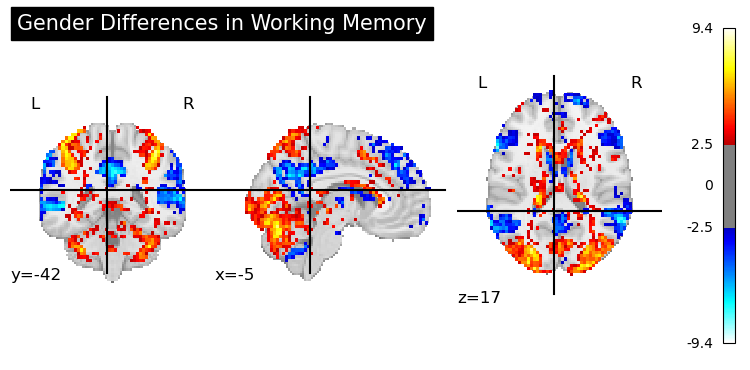

In [100]:
# now we have everything, we need to visualise data 
nplt.plot_stat_map(gender_difference_map, threshold=2.5, title="Gender Differences in Working Memory") 
# here a brain activation map is made that show regions where male-female differences are statistically significant
# 2.5 is commonly used as a threshold 
gender_difference_map.to_filename("gender_difference_map.nii") # here we save that as a file 

# we can extract the z-scores from the map 
gender_data = get_data(gender_difference_map)
gender_df = pd.DataFrame(gender_data.flatten(), columns=["z_score"])
gender_df.to_csv("gender_difference_map.csv", index=False) # here we save it as a cvs file 

plot_stat_map(gender_difference_map, threshold=2.5, display_mode="ortho", output_file="gender_difference_map.png") 
# this makes it a visual that can be saved
# positive Z-score regions have higher activation in males compared to females
# negative Z-score regions have higher activation in females compared to males

In [101]:
# because we don't want potentially noisy clusters, we can remove them, here if the cluster is less than 10 voxels or smaller then 2,5 z-score, they will be removed 
corrected_map = threshold_img(
    gender_difference_map,
    threshold=2.5,
    cluster_threshold=10)
plot_stat_map(corrected_map, title="Cluster-Corrected Map", output_file = "cluster_corrected_map.png")
corrected_map.to_filename("cluster_corrected_map.nii")
# positive Z-score regions have higher activation in males compared to females
# negative Z-score regions have higher activation in females compared to males

C:\Users\elena\AppData\Local\Temp\ipykernel_16776\3148496542.py:2: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  corrected_map = threshold_img(


In [102]:
# we can also correct for individual voxels that don't have a z-score of 2.5 or greater
fdr_cluster_map = math_img("img * (img > 2.5)", img=corrected_map)
plot_stat_map(fdr_cluster_map, title="FDR-Corrected Cluster Map",  output_file = "fdr_cluster_map.png")
fdr_cluster_map.to_filename("fdr_cluster_map.nii")
# positive Z-score regions have higher activation in males compared to females
# negative Z-score regions have higher activation in females compared to males

In [65]:
# we need to see now where peak activation occurs 
img_data = get_data(fdr_cluster_map)
peak_voxel = np.unravel_index(np.argmax(img_data), img_data.shape)
print("Peak activation at voxel coordinates:", peak_voxel)
affine = fdr_cluster_map.affine
peak_mni = np.dot(affine, list(peak_voxel) + [1])[:3]  
print("MNI Coordinates of Peak Activation:", peak_mni)

peak_voxel_data = {"Voxel Coordinates": [(37, 18, 41)], "MNI Coordinates": [list(peak_mni)]}
df = pd.DataFrame(peak_voxel_data)
df.to_csv("Peak_Activation_Coordinates.csv", index=False)

np.savetxt("Classifier_Weights.csv", classifier.coef_, delimiter=",")

plot_stat_map(weight_map, output_file="Classifier_Weight_Contribution.png")

Peak activation at voxel coordinates: (np.int64(37), np.int64(18), np.int64(41))
MNI Coordinates of Peak Activation: [ 15.         -78.          57.29999804]


In [72]:
# now that we have these voxels, we need to see what the most predictive brain regions are
aal_atlas = fetch_atlas_aal() # so we need an atlas for this 
atlas_img = aal_atlas.maps  

masker = NiftiLabelsMasker(labels_img=atlas_img, standardize=True) # we apply the atlas to extract region-wise activity
region_data = masker.fit_transform(fdr_cluster_map)

print("Potential Brain Regions:", aal_atlas.labels[:len(region_data)]) # here we can see the regions 
# left precentral gyrus (Precentral_L) is part of the primary motor cortex and is involved with movement execution.

[get_dataset_dir] Dataset found in C:\Users\elena\nilearn_data\aal_SPM12

Potential Brain Regions: ['Precentral_L']


C:\Users\elena\miniconda3\Lib\site-packages\nilearn\signal.py:77: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn(


In [96]:
# now that we have the gender differences map that tells us about the mean difference, we want to see if there are differences in patterns this is a multivoxel pattern analysis 
brain_mask = load_mni152_brain_mask() # this is a standard brain mask that we loaded
resampled_mask = resample_to_img(brain_mask, group_imgs[0], interpolation="nearest") # then we matched functional images with mask

print("Resampled Mask Affine:\n", resampled_mask.affine)
print("Image Affine:\n", group_imgs[0].affine)

print("Resampled Mask Shape:", resampled_mask.shape)
print("Functional Image Shape:", group_imgs[0].shape)

voxel_data = apply_mask(group_imgs, resampled_mask) # here we extract the voxel data

print("Voxel Data Shape:", voxel_data.shape)
print("Expected Number of Voxels:", np.prod(resampled_mask.shape))
print("Unique mask values:", np.unique(resampled_mask.get_fdata()))
print("Total Voxels in Mask:", np.sum(resampled_mask.get_fdata() > 0))

scaler = MinMaxScaler()
voxel_data = scaler.fit_transform(voxel_data)
y = [0] * len(male_contrasts) + [1] * len(female_contrasts) # we gave it labels

classifier = SVC(kernel="linear") # here we classify gender differences on activity 
classifier.fit(voxel_data, y)

cv = StratifiedKFold(n_splits=5) # here we do an evaluation with cross-validation
scores = cross_val_score(classifier, voxel_data, y, cv=cv)
print("Classification Accuracy:", scores.mean())

C:\Users\elena\AppData\Local\Temp\ipykernel_16776\2382613821.py:3: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  resampled_mask = resample_to_img(brain_mask, group_imgs[0], interpolation="nearest") # then we matched functional images with mask
C:\Users\elena\miniconda3\Lib\site-packages\nilearn\image\resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(


Resampled Mask Affine:
 [[   3.            0.            0.          -96.        ]
 [   0.            3.            0.         -132.        ]
 [   0.            0.            3.29999995  -78.        ]
 [   0.            0.            0.            1.        ]]
Image Affine:
 [[   3.            0.            0.          -96.        ]
 [   0.            3.            0.         -132.        ]
 [   0.            0.            3.29999995  -78.        ]
 [   0.            0.            0.            1.        ]]
Resampled Mask Shape: (65, 77, 60)
Functional Image Shape: (65, 77, 60)
Voxel Data Shape: (199, 63375)
Expected Number of Voxels: 300300
Unique mask values: [0. 1.]
Total Voxels in Mask: 63375
Classification Accuracy: 0.678076923076923


[get_dataset_dir] Dataset found in C:\Users\elena\nilearn_data\aal_SPM12

C:\Users\elena\miniconda3\Lib\site-packages\nilearn\plotting\find_cuts.py:148: UserWarning: Could not determine cut coords: All voxels were masked by the thresholding. Returning the center of mass instead.
  warnings.warn(
C:\Users\elena\miniconda3\Lib\site-packages\nilearn\plotting\displays\_slicers.py:313: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


Min Weight: -0.006398215933460825
Max Weight: 0.0057139314550816766


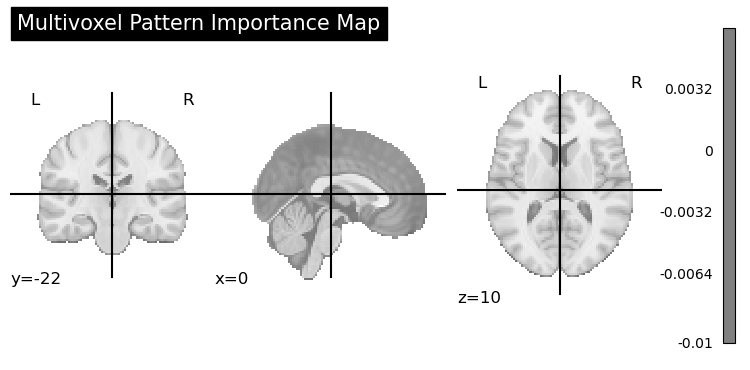

In [97]:
# we want to see if there are differences in the activity patterns 
atlas = fetch_atlas_aal() # so we need to use an atlas 
atlas_img = atlas.maps  
atlas_labels = atlas.labels

full_brain_weights = np.zeros(resampled_mask.shape)
full_brain_weights[resampled_mask.get_fdata() > 0] = classifier.coef_[0]
weight_map = nib.Nifti1Image(full_brain_weights, resampled_mask.affine)

plotting.plot_stat_map(weight_map,threshold=0.01, title="Multivoxel Pattern Importance Map")
print("Min Weight:", classifier.coef_.min())
print("Max Weight:", classifier.coef_.max())

# what this means it that there are no meningfull gender differenc es in patterns of activation, even at 0.01 (which is a low threshold, nothing shows up)